In [2]:
import eagleSqlTools as est
import numpy as np
import matplotlib.colors

In [ ]:
###here we remove the very centre + calculating standart deviation and mean

In [3]:
conn = est.connect("lzm898", "YB854nic", "http://virgodb.dur.ac.uk:8080/MyMillennium")

In [4]:
query1="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [5]:
res1=est.execute_query(conn, query1)

In [6]:
np.save('res1.npy', res1)

In [7]:
xyzm = np.load('res1.npy')

In [8]:
s=len(xyzm)
halo_mass=np.zeros(s)
for i in range(s):
    halo_mass[i]=xyzm[i][3]
#print (halo_mass)
r_vec=np.zeros((s,3))
r_scal=np.zeros(s)
for i in range(s):
    r_scal[i]=np.sqrt(xyzm[i][0]**2+xyzm[i][1]**2+xyzm[i][2]**2)
    r_vec[i]=np.array([xyzm[i][0], xyzm[i][1], xyzm[i][2]])
acc_tot=0
acc_sca=np.zeros(s)
acc_scal=np.zeros(s)
G=4.301*10**(-9)
for i in range(s):
    acc_sca[i]=G*halo_mass[i]/(r_scal[i]**3)
    acc_scal[i]=acc_sca[i]/(3.08*10**19)*10**3
    acc_tot=acc_tot+acc_scal[i]*r_vec[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag=np.sqrt(acc_tot[0]**2+acc_tot[1]**2+acc_tot[2]**2)
#print(a_mag)
print(s)

[-1.31789914e-13  1.33275476e-13  1.76494570e-14]
50979


In [9]:
## we got total acceleration 10 times smaller than v_MW/age
#Let uscalculate the separate accelerations from each halos we took

In [10]:
a_cart=np.zeros((s,3))
for i in range(s):
    a_cart[i]=acc_scal[i]*r_vec[i]
#print (a_cart)
#print(a_cart.shape)

In [11]:
# now let us see hoe many halos give comparable acceleration to v_MW/age
#print(a_cart)
k=0
#print(a_cart)
for i in range(s):
    if np.sqrt(a_cart[i][0]**2+a_cart[i][1]**2+a_cart[i][2]**2)>=a:
        k=k+1
print(k)

0


In [12]:
a_r=np.zeros(s)
for i in range(s):
    a_r[i]=np.sqrt(a_cart[i][0]**2+a_cart[i][1]**2+a_cart[i][2]**2)

2028
2.980371833227571e-12


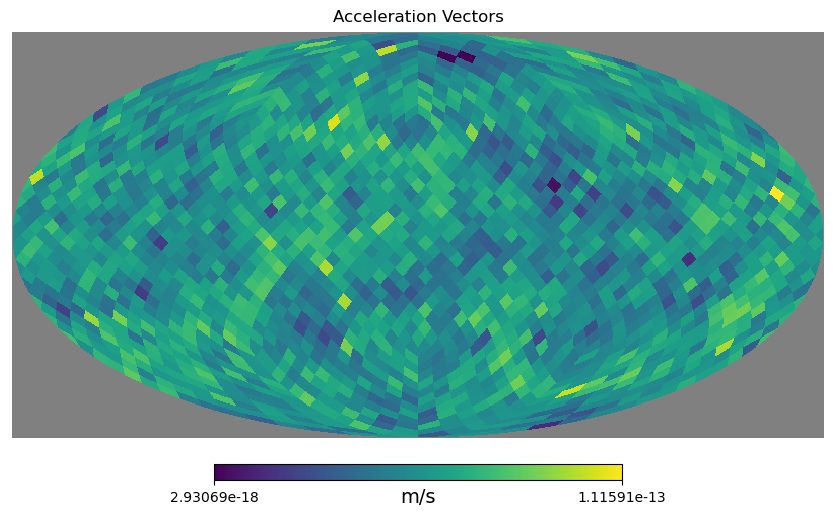

In [13]:
#putting already known acceleration vectors


import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside = 13
npix = hp.nside2npix(Nside)
vecs = a_cart
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices=hp.pixelfunc.vec2pix(Nside, list(vecs[:,0]*u.dimensionless_unscaled),
        list(vecs[:,1]*u.dimensionless_unscaled),
        list(vecs[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside)
counts, _ = np.histogram(pix_indices, bins, weights=a_r)

# Plot the skymap

# Plot the skymap
hp.mollview(counts, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')
print(len(counts))
print(sum(counts))

In [14]:
#print(counts[:1000])

In [15]:
##Now let us change the mass constraint and get halos for galaxies for which mstars_bulge+mstars_disk >=3*10^10

In [16]:
query2="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >3*1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [17]:
res2=est.execute_query(conn, query2)

In [18]:
np.save('res2.npy', res2)

In [19]:
xyzm2 = np.load('res2.npy')

In [20]:
s2=len(xyzm2)
halo_mass2=np.zeros(s2)
for i in range(s2):
    halo_mass2[i]=xyzm2[i][3]
#print (halo_mass)
r_vec2=np.zeros((s2,3))
r_scal2=np.zeros(s2)
for i in range(s2):
    r_scal2[i]=np.sqrt(xyzm2[i][0]**2+xyzm2[i][1]**2+xyzm2[i][2]**2)
    r_vec2[i]=np.array([xyzm2[i][0], xyzm2[i][1], xyzm2[i][2]])
acc_tot2=0
acc_sca2=np.zeros(s2)
acc_scal2=np.zeros(s2)
G=4.301*10**(-9)
for i in range(s2):
    acc_sca2[i]=G*halo_mass2[i]/(r_scal2[i]**3)
    acc_scal2[i]=acc_sca2[i]/(3.08*10**19)*10**3
    acc_tot2=acc_tot2+acc_scal2[i]*r_vec2[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot2)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag2=np.sqrt(acc_tot2[0]**2+acc_tot2[1]**2+acc_tot2[2]**2)
#print(a_mag)
s2

[-1.37227215e-13  1.07164030e-13 -4.46674216e-14]


24396

In [21]:
a_cart2=np.zeros((s2,3))
for i in range(s2):
    a_cart2[i]=acc_scal2[i]*r_vec2[i]

In [22]:
k2=0
#print(a_cart)
for i in range(s2):
    if np.sqrt(a_cart2[i][0]**2+a_cart2[i][1]**2+a_cart2[i][2]**2)>=a:
        k2=k2+1
print(k2)

0


In [23]:
a_r2=np.zeros(s2)
for i in range(s2):
    a_r2[i]=np.sqrt(a_cart2[i][0]**2+a_cart2[i][1]**2+a_cart2[i][2]**2)

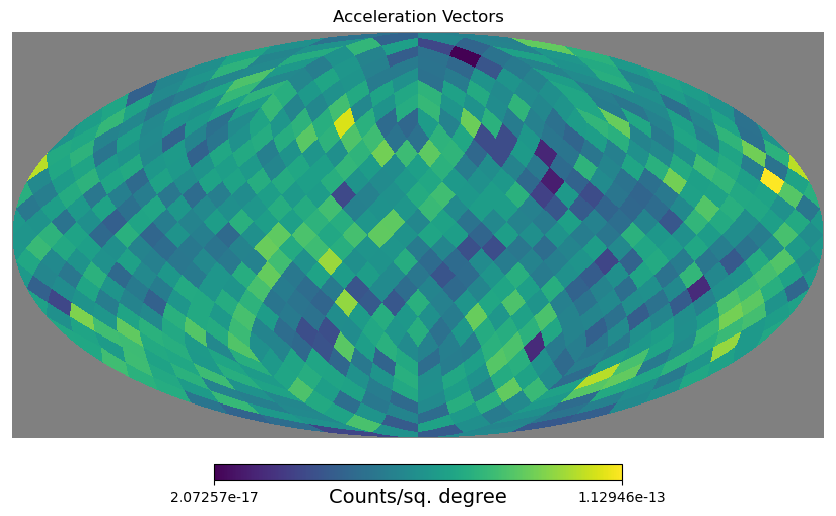

In [24]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside2 = 8
npix2 = hp.nside2npix(Nside2)
vecs2 = a_cart2
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices2=hp.pixelfunc.vec2pix(Nside2, list(vecs2[:,0]*u.dimensionless_unscaled),
        list(vecs2[:,1]*u.dimensionless_unscaled),
        list(vecs2[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
counts2, _ = np.histogram(pix_indices2, bins=hp.nside2npix(Nside2), weights=a_r2)

# Plot the skymap
hp.mollview(counts2,  norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='Counts/sq. degree')


In [25]:
theta2=np.zeros(s2)
phi2=np.zeros(s2)
for i in range(s2):
    theta2[i]=np.arctan(a_cart2[i][1]/a_cart2[i][0])
    phi2[i]=np.arccos(a_cart2[i][2]/a_r2[i])

In [26]:
##Let us do another constraint, mstars_bulge+mstars_disk>=10^11

In [27]:
query3="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e7 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [28]:
res3=est.execute_query(conn, query3)

In [29]:
np.save('res3.npy', res3)

In [30]:
xyzm3 = np.load('res3.npy')

In [31]:
s3=len(xyzm3)
halo_mass3=np.zeros(s3)
for i in range(s3):
    halo_mass3[i]=xyzm3[i][3]
#print (halo_mass)
r_vec3=np.zeros((s3,3))
r_scal3=np.zeros(s3)
for i in range(s3):
    r_scal3[i]=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)
    r_vec3[i]=np.array([xyzm3[i][0], xyzm3[i][1], xyzm3[i][2]])
acc_tot3=0
acc_sca3=np.zeros(s3)
acc_scal3=np.zeros(s3)
G=4.301*10**(-9)
for i in range(s3):
    acc_sca3[i]=G*halo_mass3[i]/(r_scal3[i]**3)
    acc_scal3[i]=acc_sca3[i]/(3.08*10**19)*10**3
    acc_tot3=acc_tot3+acc_scal3[i]*r_vec3[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot3)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag3=np.sqrt(acc_tot3[0]**2+acc_tot3[1]**2+acc_tot3[2]**2)
#print(a_mag)
s3

[-2.99483472e-14  3.14725498e-13  2.56427245e-13]


2201925

In [342]:
#Acceleration for shell <50 Mpc, calculated as volume of the shell*omega_matter=0.2 1kg=5.10^-31 Msolar, 1 mpc-3.08^10^22m
rho_matter= 1.89*10**(-27) #kg/m^3
r1=50*3.08*10**22
r2=21*3.08*10**22
m_shell=4*np.pi*r1**2*rho_matter/3
m_shell1=m_shell*5*10**(-31)
acceleration=m_shell1*G/(50**2)
print(m_shell)
print(acceleration)

5.632654459763688e+22
4.845209366288726e-20


In [32]:
a_cart3=np.zeros((s3,3))
for i in range(s3):
    a_cart3[i]=acc_scal3[i]*r_vec3[i]
#print (a_cart)
#print(a_cart.shape)
print(acc_sca[4071])

0.0010012176376476938


In [33]:
# now let us see hoe many halos give comparable acceleration to v_MW/age
#print(a_cart)
k3=0
#print(a_cart)
for i in range(s3):
    if np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)>=a:
        k3=k3+1
print(k)

0


In [34]:
a_r3=np.zeros(s3)
for i in range(s3):
    a_r3[i]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
print(a_r3)

[1.91486174e-21 4.45286618e-21 1.03193328e-21 ... 4.93789625e-20
 4.04078846e-20 3.75920653e-20]


/Users/user/.local/lib/python3.9/site-packages/healpy/pixelfunc.py:656: RuntimeWarning: divide by zero encountered in _vec2pix_ring
  return pixlib._vec2pix_ring(nside, x, y, z)
/Users/user/.local/lib/python3.9/site-packages/healpy/pixelfunc.py:656: RuntimeWarning: invalid value encountered in _vec2pix_ring
  return pixlib._vec2pix_ring(nside, x, y, z)


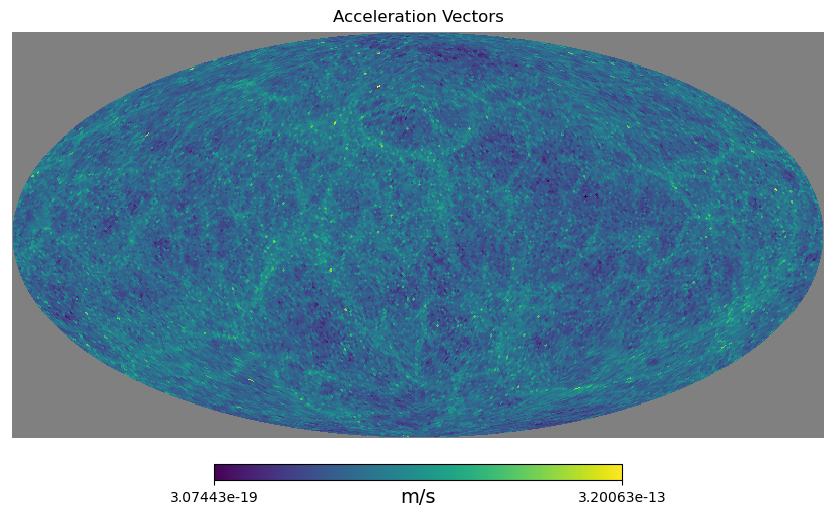

In [35]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside3 = 64
npix3 = hp.nside2npix(Nside3)
vecs3 = a_cart3
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices3=hp.pixelfunc.vec2pix(Nside3, list(vecs3[:,0]*u.dimensionless_unscaled),
        list(vecs3[:,1]*u.dimensionless_unscaled),
        list(vecs3[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3, _ = np.histogram(pix_indices3, bins, weights=a_r3)

# Plot the skymap
hp.mollview(counts3, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')

In [36]:
#chack why I have few numbers of galaxies. I just get that from data.
#what is the size of a pixel in square degree, sterafdians.

In [37]:
# pixel size in degrees
pixel_size_deg = 2 * np.sqrt(3) * np.pi / Nside
print (pixel_size_deg)
#in square degrees
area_sq_deg = np.pi * (pixel_size_deg** 2)
print(area_sq_deg)

0.8371381681081005
2.2016291133940697


In [38]:
## Noe let us plot different shells

In [123]:
summ=np.zeros(20)
ac_vec1=np.zeros((s3,3))
ac_vec2=np.zeros((s3,3))
ac_vec3=np.zeros((s3,3))
ac_vec4=np.zeros((s3,3))
ac_vec5=np.zeros((s3,3))
ac_vec6=np.zeros((s3,3))
ac_vec7=np.zeros((s3,3))
ac_vec8=np.zeros((s3,3))
ac_vec9=np.zeros((s3,3))
ac_vec10=np.zeros((s3,3))
acc_vec1=np.zeros((s3,3))
acc_vec2=np.zeros((s3,3))
acc_vec3=np.zeros((s3,3))
acc_vec4=np.zeros((s3,3))
acc_vec5=np.zeros((s3,3))
ac_vec6=np.zeros((s3,3))
ac_vec7=np.zeros((s3,3))
ac_vec8=np.zeros((s3,3))
ac_vec9=np.zeros((s3,3))
ac_vec10=np.zeros((s3,3))
ar3_1=np.zeros(s3)
ar3_2=np.zeros(s3)
ar3_3=np.zeros(s3)
ar3_4=np.zeros(s3)
ar3_5=np.zeros(s3)
ar3_6=np.zeros(s3)
ar3_7=np.zeros(s3)
ar3_8=np.zeros(s3)
ar3_9=np.zeros(s3)
ar3_10=np.zeros(s3)
ar3_11=np.zeros(s3)
ar3_12=np.zeros(s3)
ar3_13=np.zeros(s3)
ar3_14=np.zeros(s3)
j1=0; j2=0; j3=0; j4=0; j5=0; j6=0; j7=0; j8=0; j9=0; j10=0
for i in range(s3):
    if 21<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<50:
        summ[1]=summ[1]+1
        ac_vec1[j1][0]=a_cart3[i][0]
        ac_vec1[j1][1]=a_cart3[i][1]
        ac_vec1[j1][2]=a_cart3[i][2]
        ar3_1[j1]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j1=j1+1
    elif 50<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<70:
        summ[2]=summ[2]+1
        ac_vec2[j2][0]=a_cart3[i][0]
        ac_vec2[j2][1]=a_cart3[i][1]
        ac_vec2[j2][2]=a_cart3[i][2]
        ar3_2[j2]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j2=j2+1
    elif 70<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<90:
        summ[3]=summ[3]+1
        ac_vec3[j3][0]=a_cart3[i][0]
        ac_vec3[j3][1]=a_cart3[i][1]
        ac_vec3[j3][2]=a_cart3[i][2]
        ar3_3[j3]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j3=j3+1
    elif 90<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<110:
        summ[4]=summ[4]+1
        ac_vec4[j4][0]=a_cart3[i][0]
        ac_vec4[j4][1]=a_cart3[i][1]
        ac_vec4[j4][2]=a_cart3[i][2]
        ar3_4[j4]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j4=j4+1
    elif 110<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<130:
        summ[5]=summ[5]+1
        ac_vec5[j5][0]=a_cart3[i][0]
        ac_vec5[j5][1]=a_cart3[i][1]
        ac_vec5[j5][2]=a_cart3[i][2]
        ar3_5[j5]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j5=j5+1
        
    elif 130<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<150:
        summ[6]=summ[6]+1
        ac_vec6[j6][0]=a_cart3[i][0]
        ac_vec6[j6][1]=a_cart3[i][1]
        ac_vec6[j6][2]=a_cart3[i][2]
        ar3_6[j6]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j6=j6+1
    elif 150<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<170:
        summ[7]=summ[7]+1
        ac_vec7[j7][0]=a_cart3[i][0]
        ac_vec7[j7][1]=a_cart3[i][1]
        ac_vec7[j7][2]=a_cart3[i][2]
        ar3_7[j7]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j7=j7+1
    elif 170<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<190:
        summ[8]=summ[8]+1
        ac_vec8[j8][0]=a_cart3[i][0]
        ac_vec8[j8][1]=a_cart3[i][1]
        ac_vec8[j8][2]=a_cart3[i][2]
        ar3_8[j8]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j8=j8+1
    elif 190<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<210:
        summ[9]=summ[9]+1
        ac_vec9[j9][0]=a_cart3[i][0]
        ac_vec9[j9][1]=a_cart3[i][1]
        ac_vec9[j9][2]=a_cart3[i][2]
        ar3_9[j9]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j9=j9+1
    elif 210<=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)<230:
        summ[10]=summ[10]+1
        ac_vec10[j10][0]=a_cart3[i][0]
        ac_vec10[j10][1]=a_cart3[i][1]
        ac_vec10[j10][2]=a_cart3[i][2]
        ar3_10[j10]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
        j10=j10+1
    
ar3_1=ar3_1[:j1]
ac_vec1 = ac_vec1[:j1]
vecs1 = ac_vec1
ar3_2=ar3_2[:j2]
ac_vec2 = ac_vec2[:j2]
vecs2=ac_vec2
ar3_3=ar3_3[:j3]
ac_vec3 = ac_vec3[:j3]
vecs3=ac_vec3
ar3_4=ar3_4[:j4]
ac_vec4 = ac_vec4[:j4]
vecs4 = ac_vec4
ar3_5=ar3_5[:j5]
ac_vec5 = ac_vec5[:j5]
vecs5 = ac_vec5
ar3_6=ar3_6[:j6]
ac_vec6 = ac_vec6[:j6]
vecs6 = ac_vec6
ar3_7=ar3_7[:j7]
ac_vec7 = ac_vec7[:j7]
vecs7 = ac_vec7
ar3_8=ar3_8[:j8]
ac_vec8 = ac_vec8[:j8]
vecs8 = ac_vec8
ar3_9=ar3_9[:j9]
ac_vec9 = ac_vec9[:j9]
vecs9 = ac_vec9
ar3_10=ar3_10[:j10]
ac_vec10 = ac_vec10[:j10]
vecs10 = ac_vec10

# convert sky coordinates to Galactic coordinates and then in pixels

In [124]:
print("max <50pc=", max(ar3_1),",  ",j1)
print("max 50<r<70pc=", max(ar3_2), ",  ",j2)
print("max <50pc=", max(ar3_3), ",  ",j3)
print("max <50pc=", max(ar3_4), ",  ",j4)
print("max <50pc=", max(ar3_5), ",  ",j5)
print("max <50pc=", max(ar3_6), ",  ",j6)
print("max <50pc=", max(ar3_7), ",  ",j7)
print("max <50pc=", max(ar3_8), ",  ",j8)
print("max <50pc=", max(ar3_9), ",  ",j9)
print("max <50pc=", max(ar3_10), ",  ",j10)


max <50pc= 1.1105650018343888e-13 ,   29799
max 50<r<70pc= 2.0676442256029568e-14 ,   58231
max <50pc= 6.373067269970532e-14 ,   113011
max <50pc= 1.619313502673263e-14 ,   163202
max <50pc= 7.847596955392127e-15 ,   251940
max <50pc= 1.314878878841395e-14 ,   343829
max <50pc= 1.0186409658812408e-14 ,   428117
max <50pc= 4.948655616521507e-15 ,   514194
max <50pc= 2.3412861558519727e-15 ,   296593


ValueError: max() arg is an empty sequence

In [125]:
print(j3)

113011


In [289]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_1=hp.pixelfunc.vec2pix(Nside3, list(vecs1[:,0]*u.dimensionless_unscaled),
        list(vecs1[:,1]*u.dimensionless_unscaled),
        list(vecs1[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_1, _ = np.histogram(pix_indices3_1, bins, weights=ar3_1)
counts3_1[counts3_1<=1e-19]=1e-19
#sum_product = np.sum(counts3_1 * bin_centers)

# Calculate the sum of the bin values
sum_counts1 = np.sum(counts3_1)

# Calculate the mean value
mean_value1 = sum_counts1 / bins
meanval1=np.mean(counts3_1)
sqsum_counts3_1=np.sum(counts3_1**2)/bins
#st_dev3_1=np.sqrt(np.sum((counts3_1-mean_value1)**2)/bins)
print("Mean value of histogram: ", mean_value1)
# Plot the skymap
#hp.mollview(counts3_1, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s', hold=True)
#print(st_dev3_1)
st_dev3_1=np.sqrt(np.sum((counts3_1-mean_value1)**2)/bins)
print(st_dev3_1)
#plt.plot(mean_value1, "r*")


Mean value of histogram:  1.340121378890955e-17
5.309538316451542e-16


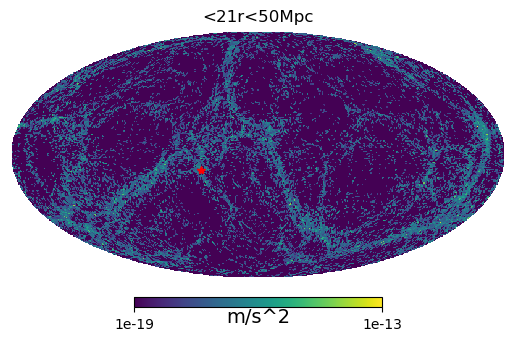

In [290]:
r = 0.5  # point size

# Find indices of maximum value
max_idx1 = np.argmax(counts3_1)

# Convert indices to spherical coordinates (theta, phi)
theta1, phi1 = hp.pix2ang(64, max_idx1)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x1, y1, z1 = hp.ang2vec(theta1, phi1)

# Normalize Cartesian coordinates to unit sphere
norm_xyz1 = np.linalg.norm([x1, y1, z1])
x1 /= norm_xyz1
y1 /= norm_xyz1
z1 /= norm_xyz1

# Scale Cartesian coordinates by desired size
x1 *= r
y1 *= r
z1 *= r

# Plot the mollview
hp.mollview(counts3_1, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='<21r<50Mpc', unit='m/s^2', badcolor="white", hold=True)

# Plot the point on the pixel with maximal value
plt.plot(x1, y1, 'r*')  # plot the red point

plt.show()

In [249]:
from matplotlib.colors import LogNorm
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_2=hp.pixelfunc.vec2pix(Nside3, list(vecs2[:,0]*u.dimensionless_unscaled),
        list(vecs2[:,1]*u.dimensionless_unscaled),
        list(vecs2[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_2, _ = np.histogram(pix_indices3_2, bins, weights=ar3_2)
counts3_2[counts3_2<=1e-19]=1e-19
vmin=float(10**(-19))
vmax=float(10**(-13))
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts2 = np.sum(counts3_2)

# Calculate the mean value
mean_value2 = sum_counts2 / bins
st_dev3_2=np.sqrt(np.sum((counts3_2-mean_value2)**2)/bins)
print("Mean value of histogram: ", mean_value2)
# Plot the skymap
#norm=matplotlib.colors.LogNorm(vmin,vmax)
#hp.mollview(counts3_2, norm=LogNorm(), min=10**(-18), max=10**(-13), title='50<=r<60Mpc', unit='m/s')
print(st_dev3_2)

Mean value of histogram:  8.71509693616209e-18
1.5784170392553662e-16


In [292]:
r = 0.5  # point size

# Find indices of maximum value
max_idx2 = np.argmax(counts3_2)

# Convert indices to spherical coordinates (theta, phi)
theta2, phi2 = hp.pix2ang(64, max_idx2)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x2, y2, z2 = hp.ang2vec(theta2, phi2)

# Normalize Cartesian coordinates to unit sphere
norm_xyz2 = np.linalg.norm([x2, y2, z2])
x2 /= norm_xyz2
y2 /= norm_xyz2
z2 /= norm_xyz2

# Scale Cartesian coordinates by desired size
x2 *= r
y2 *= r
z2 *= r

# Plot the mollview
#hp.mollview(counts3_1, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='<21r<50Mpc', unit='m/s^2', badcolor="white", hold=True)

# Plot the point on the pixel with maximal value
#plt.plot(x, y, 'r*')  # plot the red point

#plt.show()

In [293]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_3=hp.pixelfunc.vec2pix(Nside3, list(vecs3[:,0]*u.dimensionless_unscaled),
        list(vecs3[:,1]*u.dimensionless_unscaled),
        list(vecs3[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_3, _ = np.histogram(pix_indices3_3, bins, weights=ar3_3)
counts3_3[counts3_3<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts3 = np.sum(counts3_3)

# Calculate the mean value
mean_value3 = sum_counts3 / bins
st_dev3_3=np.sqrt(np.sum((counts3_3-mean_value3)**2)/bins)
print("Mean value of histogram: ", mean_value3)
#hp.mollview(counts3_3, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')
print(st_dev3_3)

Mean value of histogram:  1.1925292010674203e-17
3.712526627341736e-16


In [294]:
r = 0.5  # point size

# Find indices of maximum value
max_idx3 = np.argmax(counts3_3)

# Convert indices to spherical coordinates (theta, phi)
theta3, phi3 = hp.pix2ang(64, max_idx3)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x3, y3, z3 = hp.ang2vec(theta3, phi3)

# Normalize Cartesian coordinates to unit sphere
norm_xyz3 = np.linalg.norm([x3, y3, z3])
x3 /= norm_xyz3
y3 /= norm_xyz3
z3 /= norm_xyz3

# Scale Cartesian coordinates by desired size
x3 *= r
y3 *= r
z3 *= r

# Plot the mollview
#plt.show()

In [251]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_4=hp.pixelfunc.vec2pix(Nside3, list(vecs4[:,0]*u.dimensionless_unscaled),
        list(vecs4[:,1]*u.dimensionless_unscaled),
        list(vecs4[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_4, _ = np.histogram(pix_indices3_4, bins, weights=ar3_4)
counts3_4[counts3_4<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts4 = np.sum(counts3_4)

# Calculate the mean value
mean_value4 = sum_counts4 / bins
st_dev3_4=np.sqrt(np.sum((counts3_4-mean_value4)**2)/bins)
print("Mean value of histogram: ", mean_value4)
# Plot the skymap
#hp.mollview(counts3_4, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')
print(st_dev3_4)

Mean value of histogram:  8.97502930523222e-18
1.1845426365926914e-16


In [295]:
r = 0.5  # point size

# Find indices of maximum value
max_idx4 = np.argmax(counts3_4)

# Convert indices to spherical coordinates (theta, phi)
theta4, phi4 = hp.pix2ang(64, max_idx4)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x4, y4, z4 = hp.ang2vec(theta4, phi4)

# Normalize Cartesian coordinates to unit sphere
norm_xyz4 = np.linalg.norm([x4, y4, z4])
x4 /= norm_xyz4
y4 /= norm_xyz4
z4 /= norm_xyz4

# Scale Cartesian coordinates by desired size
x4 *= r
y4 *= r
z4 *= r

In [252]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_5=hp.pixelfunc.vec2pix(Nside3, list(vecs5[:,0]*u.dimensionless_unscaled),
        list(vecs5[:,1]*u.dimensionless_unscaled),
        list(vecs5[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_5, _ = np.histogram(pix_indices3_5, bins, weights=ar3_5)
counts3_5[counts3_5<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts5 = np.sum(counts3_5)

# Calculate the mean value
mean_value5 = sum_counts5 / bins
st_dev3_5=np.sqrt(np.sum((counts3_5-mean_value5)**2)/bins)
print("Mean value of histogram: ", mean_value5)
# Plot the skymap
#hp.mollview(counts3_5, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')
print(st_dev3_5)

Mean value of histogram:  9.547813764402178e-18
7.502517233749528e-17


In [296]:
r = 0.5  # point size

# Find indices of maximum value
max_idx5 = np.argmax(counts3_5)

# Convert indices to spherical coordinates (theta, phi)
theta5, phi5 = hp.pix2ang(64, max_idx5)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x5, y5, z5 = hp.ang2vec(theta5, phi5)

# Normalize Cartesian coordinates to unit sphere
norm_xyz5 = np.linalg.norm([x5, y5, z5])
x5 /= norm_xyz5
y5 /= norm_xyz5
z5 /= norm_xyz5

# Scale Cartesian coordinates by desired size
x5 *= r
y5 *= r
z5 *= r

In [253]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_6=hp.pixelfunc.vec2pix(Nside3, list(vecs6[:,0]*u.dimensionless_unscaled),
        list(vecs6[:,1]*u.dimensionless_unscaled),
        list(vecs6[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_6, _ = np.histogram(pix_indices3_6, bins, weights=ar3_6)
counts3_6[counts3_6<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts6 = np.sum(counts3_6)

# Calculate the mean value
mean_value6= sum_counts6 / bins
st_dev3_6=np.sqrt(np.sum((counts3_6-mean_value6)**2)/bins)
print("Mean value of histogram: ", mean_value6)
# Plot the skymap
#hp.mollview(counts3_6, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')


Mean value of histogram:  1.0424249278256424e-17


In [297]:
r = 0.5  # point size

# Find indices of maximum value
max_idx6 = np.argmax(counts3_6)

# Convert indices to spherical coordinates (theta, phi)
theta6, phi6 = hp.pix2ang(64, max_idx6)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x6, y6, z6 = hp.ang2vec(theta6, phi6)

# Normalize Cartesian coordinates to unit sphere
norm_xyz6 = np.linalg.norm([x6, y6, z6])
x6 /= norm_xyz6
y6 /= norm_xyz6
z6 /= norm_xyz6

# Scale Cartesian coordinates by desired size
x6 *= r
y6 *= r
z6 *= r

In [254]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_7=hp.pixelfunc.vec2pix(Nside3, list(vecs7[:,0]*u.dimensionless_unscaled),
        list(vecs7[:,1]*u.dimensionless_unscaled),
        list(vecs7[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_7, _ = np.histogram(pix_indices3_7, bins, weights=ar3_7)
counts3_7[counts3_7<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts7 = np.sum(counts3_7)

# Calculate the mean value
mean_value7 = sum_counts7 / bins
st_dev3_7=np.sqrt(np.sum((counts3_7-mean_value7)**2)/bins)
print("Mean value of histogram: ", mean_value7)
# Plot the skymap
#hp.mollview(counts3_7, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')

Mean value of histogram:  9.722976800371715e-18


In [298]:
r = 0.5  # point size

# Find indices of maximum value
max_idx7 = np.argmax(counts3_7)

# Convert indices to spherical coordinates (theta, phi)
theta7, phi7 = hp.pix2ang(64, max_idx7)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x7, y7, z7 = hp.ang2vec(theta7, phi7)

# Normalize Cartesian coordinates to unit sphere
norm_xyz7 = np.linalg.norm([x7, y7, z7])
x7 /= norm_xyz7
y7 /= norm_xyz7
z7 /= norm_xyz7

# Scale Cartesian coordinates by desired size
x7 *= r
y7 *= r
z7 *= r

In [255]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_8=hp.pixelfunc.vec2pix(Nside3, list(vecs8[:,0]*u.dimensionless_unscaled),
        list(vecs8[:,1]*u.dimensionless_unscaled),
        list(vecs8[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_8, _ = np.histogram(pix_indices3_8, bins, weights=ar3_8)
counts3_8[counts3_8<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts8 = np.sum(counts3_8)

# Calculate the mean value
mean_value8 = sum_counts8 / bins
st_dev3_8=np.sqrt(np.sum((counts3_8-mean_value8)**2)/bins)
print("Mean value of histogram: ", mean_value8)
# Plot the skymap
#hp.mollview(counts3_8, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')

Mean value of histogram:  8.839858741858687e-18


In [299]:
r = 0.5  # point size

# Find indices of maximum value
max_idx8 = np.argmax(counts3_8)

# Convert indices to spherical coordinates (theta, phi)
theta8, phi8 = hp.pix2ang(64, max_idx8)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x8, y8, z8 = hp.ang2vec(theta8, phi8)

# Normalize Cartesian coordinates to unit sphere
norm_xyz8 = np.linalg.norm([x8, y8, z8])
x8 /= norm_xyz8
y8 /= norm_xyz8
z8 /= norm_xyz8

# Scale Cartesian coordinates by desired size
x8 *= r
y8 *= r
z8 *= r

In [256]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_9=hp.pixelfunc.vec2pix(Nside3, list(vecs9[:,0]*u.dimensionless_unscaled),
        list(vecs9[:,1]*u.dimensionless_unscaled),
        list(vecs9[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
bins1 = hp.pix2vec(Nside3, np.arange(npix3))
bin_centers = np.arccos(bins1[2])
counts3_9, bin_edges = np.histogram(pix_indices3_9, bins, weights=ar3_9)
counts3_9[counts3_9<=1e-19]=1e-19
len_be=len(bin_edges)
bin_centres=np.zeros(len_be-1)
i=1
while i!=len_be:
    bin_centers[i-1]=(bin_edges[i]-bin_edges[i-1])/2
    i+=1

#bin_centers =(bin_edges[:-1]+bin_edges[1:])/2.
print(bin_edges)
print(bin_centers)

# Calculate the sum of the product of bin values and bin centers
sum_product9 = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts9 = np.sum(counts3_9)

# Calculate the mean value
mean_value9 = sum_counts9 / bins
st_dev3_9=np.sqrt(np.sum((counts3_9-mean_value9)**2)/bins)
#mean_value1=sum_product/sum_counts
print("Mean value of histogram: ", mean_value9)
# Convert pix_indices3_9 to float or double array
# Plot the skymap
#hp.mollview(counts3_9, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')


[0.00000000e+00 9.99979655e-01 1.99995931e+00 ... 4.91490000e+04
 4.91500000e+04 4.91510000e+04]
[0.49998983 0.49998983 0.49998983 ... 0.49998983 0.49998983 0.49998983]
Mean value of histogram:  4.112195833911188e-18


In [300]:
r = 0.5  # point size

# Find indices of maximum value
max_idx9 = np.argmax(counts3_9)

# Convert indices to spherical coordinates (theta, phi)
theta9, phi9 = hp.pix2ang(64, max_idx9)

# Convert spherical coordinates to Cartesian coordinates (x, y, z)
x9, y9, z9 = hp.ang2vec(theta9, phi9)

# Normalize Cartesian coordinates to unit sphere
norm_xyz9 = np.linalg.norm([x9, y9, z9])
x9 /= norm_xyz9
y9 /= norm_xyz9
z9 /= norm_xyz9
# Scale Cartesian coordinates by desired size
x9 *= r
y9 *= r
z9 *= r

In [257]:
Nside3 = 64
npix3 = hp.nside2npix(Nside3)
pix_indices3_10=hp.pixelfunc.vec2pix(Nside3, list(vecs10[:,0]*u.dimensionless_unscaled),
        list(vecs10[:,1]*u.dimensionless_unscaled),
        list(vecs10[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3_10, _ = np.histogram(pix_indices3_10, bins, weights=ar3_10)
counts3_10[counts3_10<=1e-19]=1e-19
#sum_product = np.sum(counts3_9 * bin_centers)

# Calculate the sum of the bin values
sum_counts10 = np.sum(counts3_10)

# Calculate the mean value
mean_value10 = sum_counts10 / bins
st_dev3_10=np.sqrt(np.sum((counts3_10-mean_value10)**2)/bins)
print("Mean value of histogram: ", mean_value10)
# Plot the skymap
#hp.mollview(counts3_10, norm=matplotlib.colors.LogNorm(), title='Acceleration Vectors', unit='m/s')

Mean value of histogram:  1.0000000000000003e-19


In [258]:
dist=np.zeros(10)
mean_val=np.zeros(10)
st_dev=np.zeros(10)
dist[0]=50; dist[1]=70; dist[2]=90; dist[3]=110; dist[4]=130; dist[5]=150; dist[6]=170; dist[7]=190; dist[8]=210; dist[9]=230
mean_val[0]=mean_value1
mean_val[1]=mean_value2
mean_val[2]=mean_value3
mean_val[3]=mean_value4
mean_val[4]=mean_value5
mean_val[5]=mean_value6
mean_val[6]=mean_value7
mean_val[7]=mean_value8
mean_val[8]=mean_value9
mean_val[9]=mean_value10
st_dev[0]=st_dev3_1
st_dev[1]=st_dev3_2
st_dev[2]=st_dev3_3
st_dev[3]=st_dev3_4
st_dev[4]=st_dev3_5
st_dev[5]=st_dev3_6
st_dev[6]=st_dev3_7
st_dev[7]=st_dev3_8
st_dev[8]=st_dev3_9
st_dev[9]=st_dev3_10

Text(0, 0.5, 'mean_accel [m/s^2]')

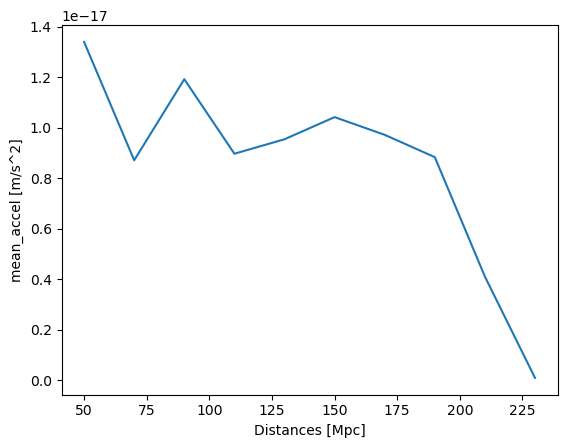

In [321]:
plt.plot(dist,mean_val)
plt.xlabel("Distances [Mpc]")
plt.ylabel("mean_accel [m/s^2]")

Text(0, 0.5, 'standard deviation')

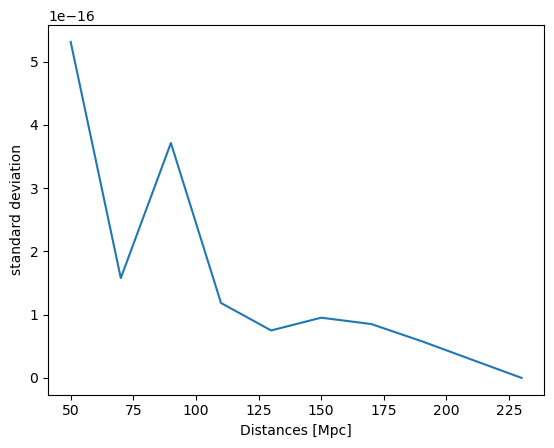

In [322]:
plt.plot(dist, st_dev)
plt.xlabel("Distances [Mpc]")
plt.ylabel("standard deviation")

In [275]:
max_val=np.zeros(10)
max_val[1]=max(counts3_1)

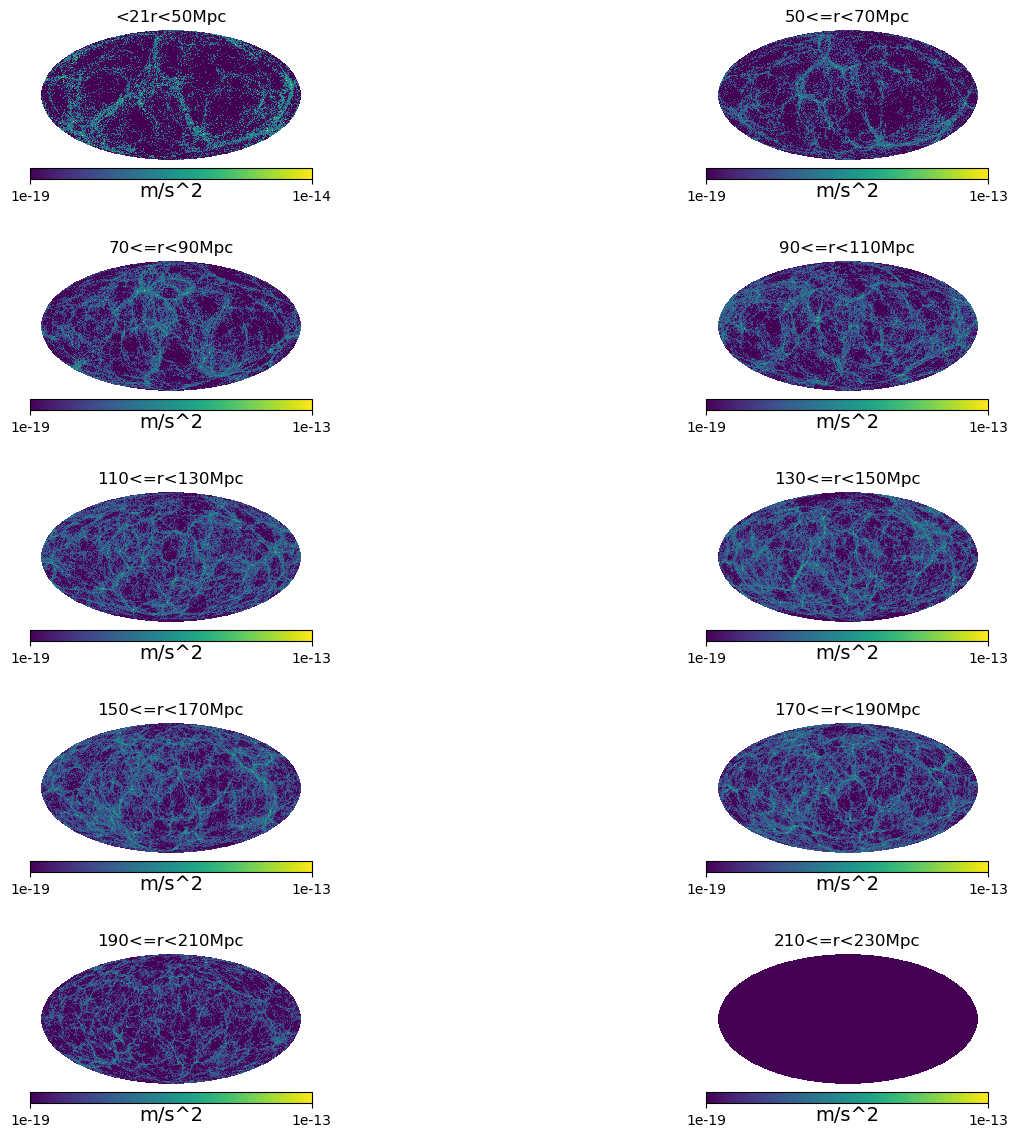

In [323]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(ncols=2, nrows=5, gridspec_kw={'hspace': 0.5}, figsize=(16,14))

plt.axes(ax1)
hp.mollview(counts3_1, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-14), title='<21r<50Mpc', unit='m/s^2', badcolor="white",hold=True)

plt.axes(ax2)
hp.mollview(counts3_2, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='50<=r<70Mpc', unit='m/s^2', badcolor="white", hold=True)

plt.axes(ax3)
hp.mollview(counts3_3, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='70<=r<90Mpc', unit='m/s^2', badcolor="white", hold=True)

plt.axes(ax4)
hp.mollview(counts3_4, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='90<=r<110Mpc', unit='m/s^2', badcolor="white",hold=True)

plt.axes(ax5)
hp.mollview(counts3_5, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='110<=r<130Mpc', unit='m/s^2', badcolor="white", hold=True)

plt.axes(ax6)
hp.mollview(counts3_6, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='130<=r<150Mpc', unit='m/s^2', badcolor="white", hold=True)

plt.axes(ax7)
hp.mollview(counts3_7, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='150<=r<170Mpc', unit='m/s^2', badcolor="white",hold=True)

plt.axes(ax8)
hp.mollview(counts3_8, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='170<=r<190Mpc', unit='m/s^2', badcolor="white", hold=True)

plt.axes(ax9)
hp.mollview(counts3_9, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='190<=r<210Mpc', unit='m/s^2', badcolor="white", hold=True)

plt.axes(ax10)
hp.mollview(counts3_10, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='210<=r<230Mpc', unit='m/s^2', badcolor="white", hold=True)

In [328]:
max(counts3_5)

7.88055640455659e-15

In [ ]:
#fig, (ax1,ax2) = plt.subplots(ncols=2)

#plt.axes(ax1)
#hp.mollview(counts3_1, norm=matplotlib.colors.LogNorm(), min=10**(-18), max=10**(-13), title='r<50Mpc', unit='m/s', hold=True)

#plt.axes(ax2)
#hp.mollview(counts3_2, norm=matplotlib.colors.LogNorm(), min=10**(-18), max=10**(-13), title='50<=r<60Mpc', unit='m/s', hold=True)

#fig, (ax1,ax2) = plt.subplots(ncols=2)

#plt.axes(ax1)
#hp.mollview(counts3_3, norm=matplotlib.colors.LogNorm(), min=10**(-18), max=10**(-13), title='60<=r<70Mpc', unit='m/s', hold=True)

#plt.axes(ax2)
#hp.mollview(counts3_4, norm=matplotlib.colors.LogNorm(), min=10**(-18), max=10**(-13), title='70<=r<80Mpc', unit='m/s', hold=True)

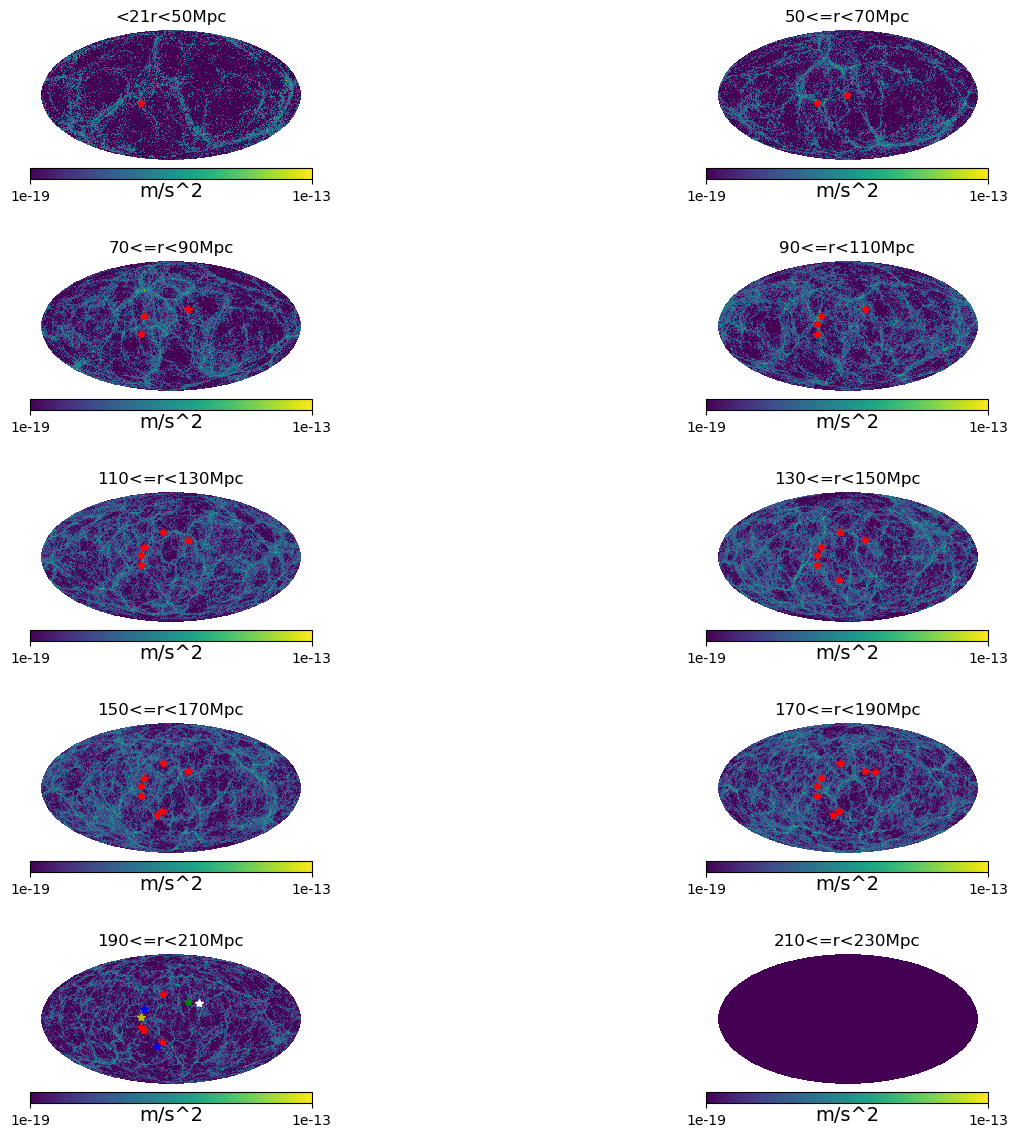

In [319]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(ncols=2, nrows=5, gridspec_kw={'hspace': 0.5}, figsize=(16,14))

plt.axes(ax1)
hp.mollview(counts3_1, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='<21r<50Mpc', unit='m/s^2', badcolor="white",hold=True)
plt.plot(x1,y1, "r*")

plt.axes(ax2)
hp.mollview(counts3_2, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='50<=r<70Mpc', unit='m/s^2', badcolor="white", hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,y2, mean_value2, "r*")

plt.axes(ax3)
hp.mollview(counts3_3, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='70<=r<90Mpc', unit='m/s^2', badcolor="white", hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "r*")
plt.plot(x3,  y3, "r*")

plt.axes(ax4)
hp.mollview(counts3_4, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='90<=r<110Mpc', unit='m/s^2', badcolor="white",hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "r*")
plt.plot(x3,  y3, "r*")
plt.plot(x4,  y4, "r*")

plt.axes(ax5)
hp.mollview(counts3_5, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='110<=r<130Mpc', unit='m/s^2', badcolor="white", hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "r*")
plt.plot(x3,  y3, "r*")
plt.plot(x4,  y4, "r*")
plt.plot(x5,  y5, "r*")

plt.axes(ax6)
hp.mollview(counts3_6, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='130<=r<150Mpc', unit='m/s^2', badcolor="white", hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "r*")
plt.plot(x3,  y3, "r*")
plt.plot(x4,  y4, "r*")
plt.plot(x5,  y5, "r*")
plt.plot(x6,  y6, "r*")

plt.axes(ax7)
hp.mollview(counts3_7, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='150<=r<170Mpc', unit='m/s^2', badcolor="white",hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "r*")
plt.plot(x3,  y3, "r*")
plt.plot(x4,  y4, "r*")
plt.plot(x5,  y5, "r*")
plt.plot(x6,  y6, "r*")
plt.plot(x7,  y7, "r*")

plt.axes(ax8)
hp.mollview(counts3_8, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='170<=r<190Mpc', unit='m/s^2', badcolor="white", hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "r*")
plt.plot(x3,  y3, "r*")
plt.plot(x4,  y4, "r*")
plt.plot(x5,  y5, "r*")
plt.plot(x6,  y6, "r*")
plt.plot(x7,  y7, "r*")
plt.plot(x8,  y8, "r*")
plt.axes(ax9)

hp.mollview(counts3_9, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='190<=r<210Mpc', unit='m/s^2', badcolor="white", hold=True)
plt.plot(x1,  y1, "r*")
plt.plot(x2,  y2, "b*")
plt.plot(x3,  y3, "g*")
plt.plot(x4,  y4, "y*")
plt.plot(x5,  y5, "r*")
plt.plot(x6,  y6, "r*")
plt.plot(x7,  y7, "b*")
plt.plot(x8,  y8, "w*")
plt.plot(x9,  y9, "r*")
plt.axes(ax10)
hp.mollview(counts3_10, norm=matplotlib.colors.LogNorm(), min=10**(-19), max=10**(-13), title='210<=r<230Mpc', unit='m/s^2', badcolor="white", hold=True)